In [6]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
import graphviz


In [7]:
df=pd.read_csv('/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churn_data=df.copy()

In [12]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
churn_data.duplicated().sum()

0

# Data Cleaning

In [14]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'].dtype

dtype('float64')

In [15]:
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churn_data['TotalCharges']=churn_data["TotalCharges"].fillna(0)
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
churn_data['tenure_q']=pd.qcut(churn_data['tenure'],q=4, labels=False)

In [18]:
churn_data.drop(columns=['customerID'], axis=1,inplace=True)

In [19]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_q
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


# Vizualizations

In [20]:
features_num= churn_data[['MonthlyCharges','TotalCharges', 'tenure', 'tenure_q']]
features_num.head()

,MonthlyCharges,TotalCharges,tenure,tenure_q
0,29.85,29.85,1,0
1,56.95,1889.50,34,2
2,53.85,108.15,2,0
3,42.30,1840.75,45,2
4,70.70,151.65,2,0


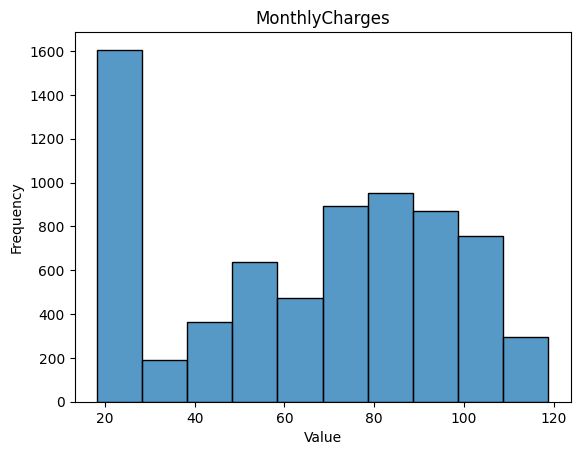

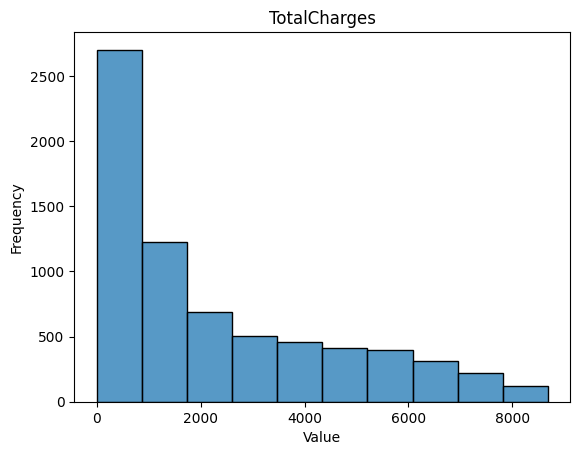

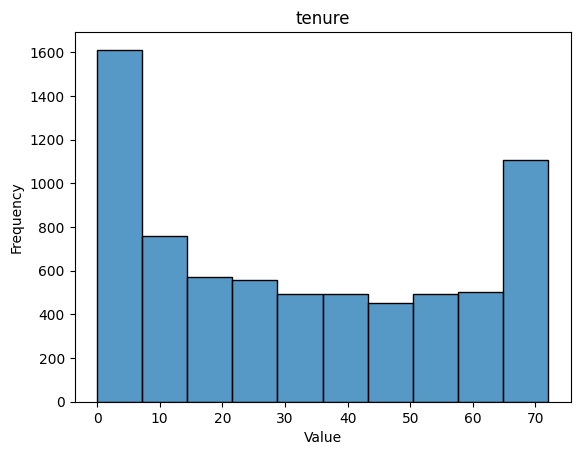

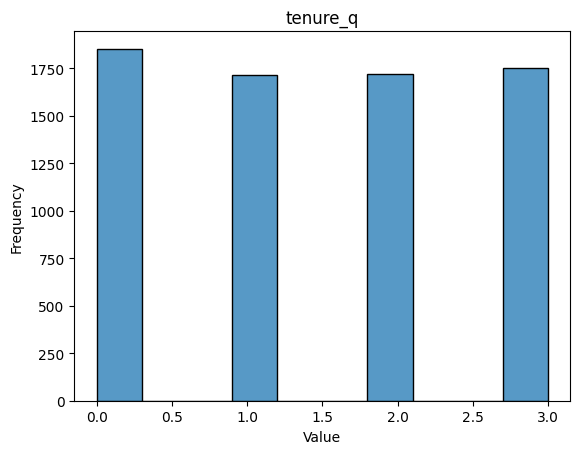

In [21]:
for column in features_num:
    sns.histplot(features_num[column], bins=10)
    plt.title(f'{column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [22]:
churn_data.drop(columns=['tenure'], axis=1,inplace=True)

In [23]:
reorder=['gender',
'SeniorCitizen',
'Partner' ,
'Dependents',
'PhoneService',
'MultipleLines' ,
'InternetService' ,
'OnlineSecurity' ,
'OnlineBackup' ,
'DeviceProtection',
'TechSupport' ,
'StreamingTV'  ,
'StreamingMovies',
'Contract' ,
'PaperlessBilling' ,
'PaymentMethod',
'MonthlyCharges',
'TotalCharges' ,
 'tenure_q' ,
'Churn'  ]
churn_data=churn_data.reindex(columns=reorder)
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_q,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,Yes


In [24]:
df_1=churn_data.iloc[:,:-4]
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [25]:
df_2=churn_data.iloc[:,-1]
df_2.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

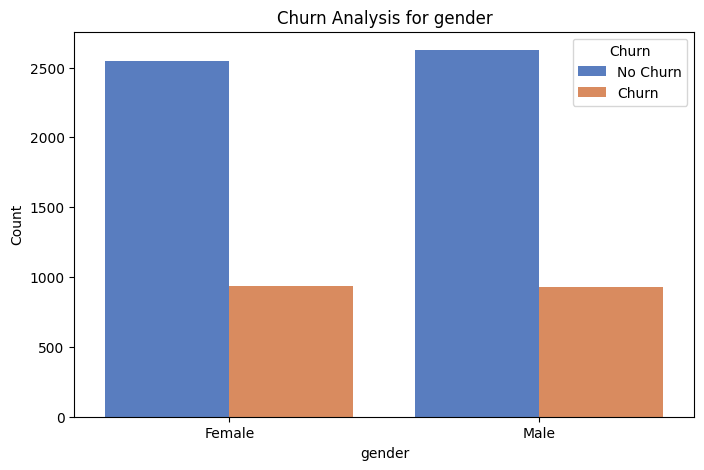

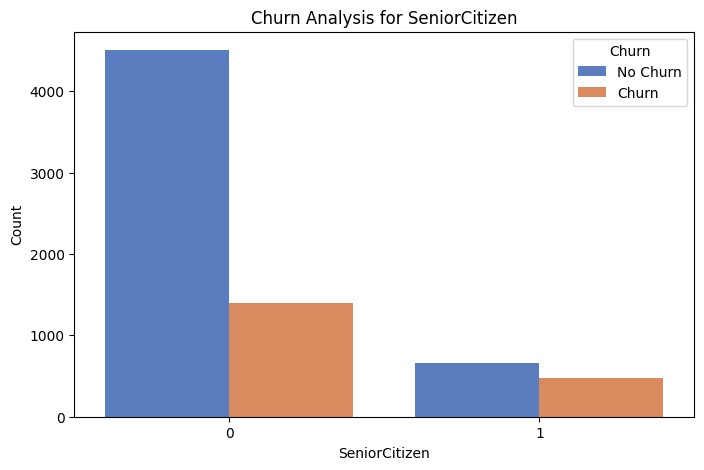

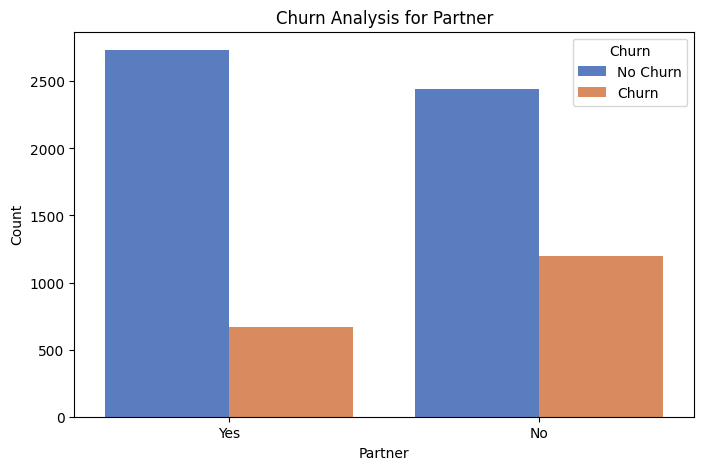

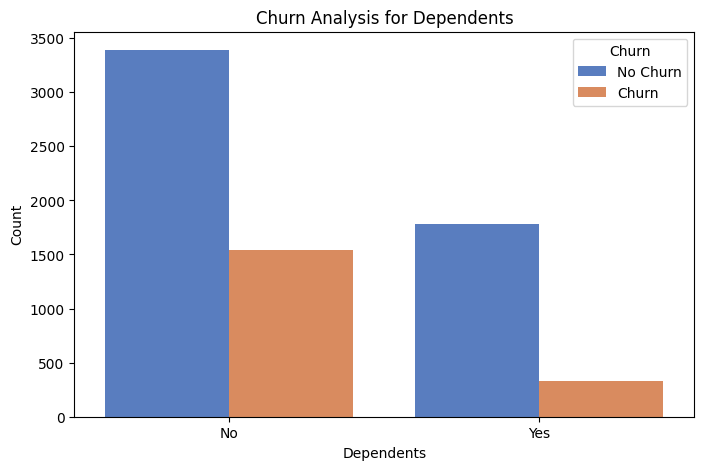

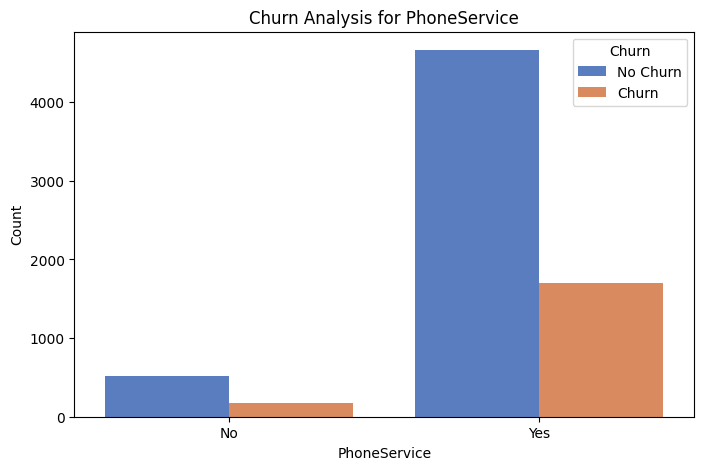

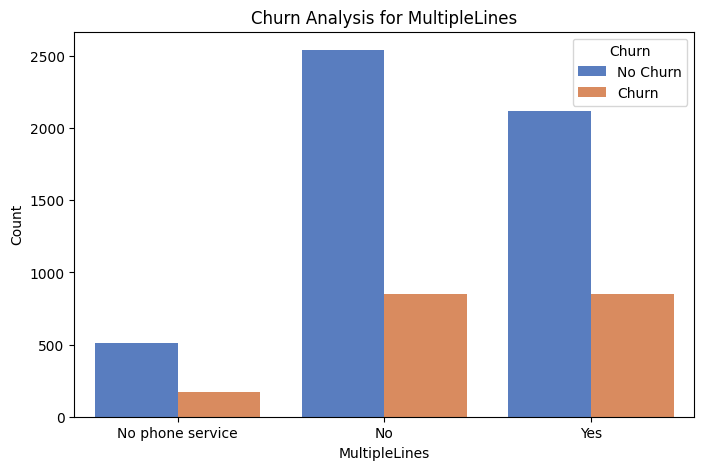

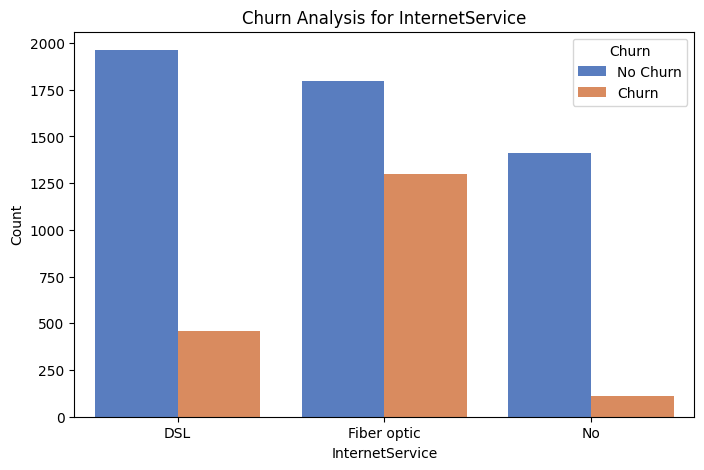

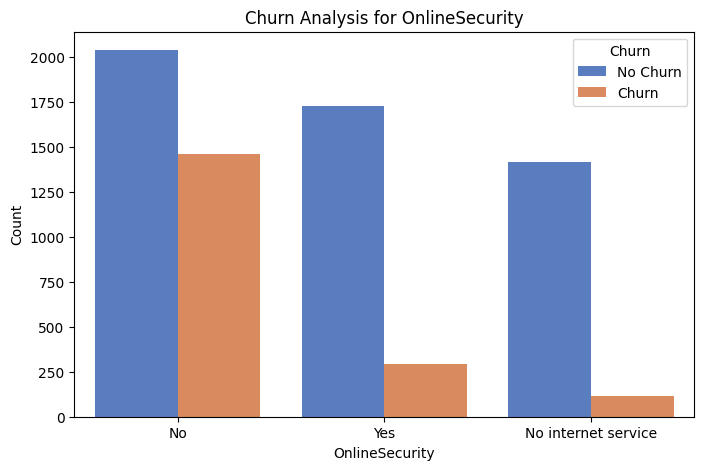

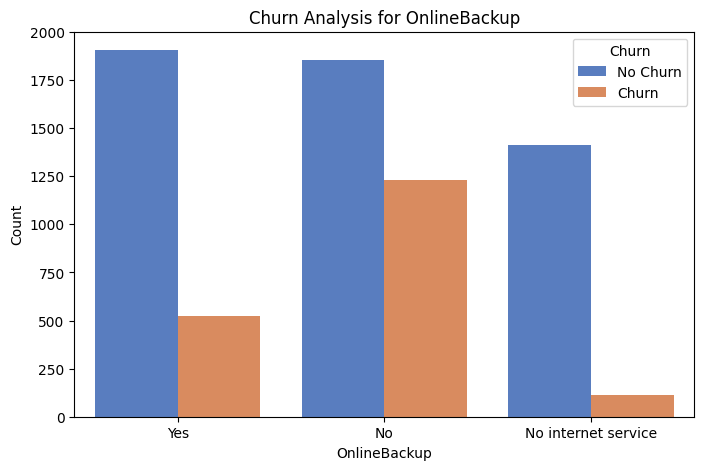

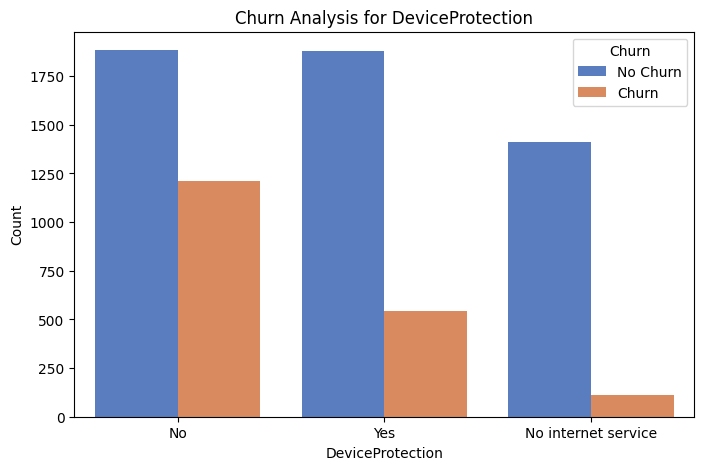

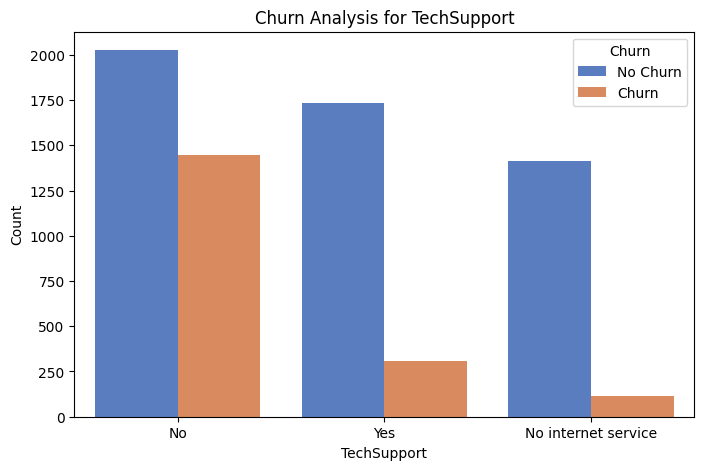

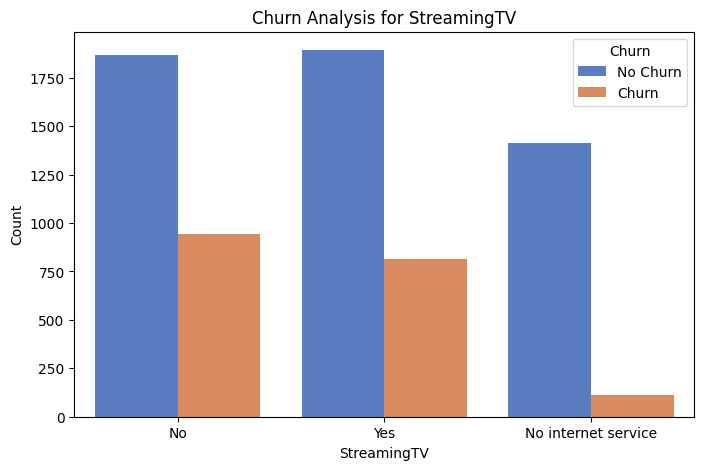

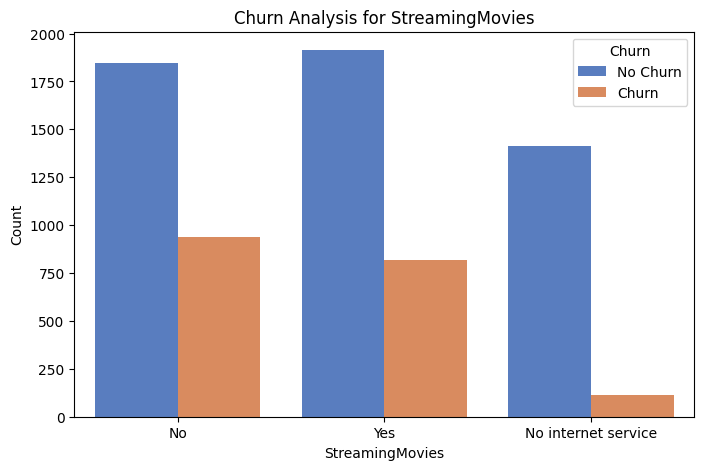

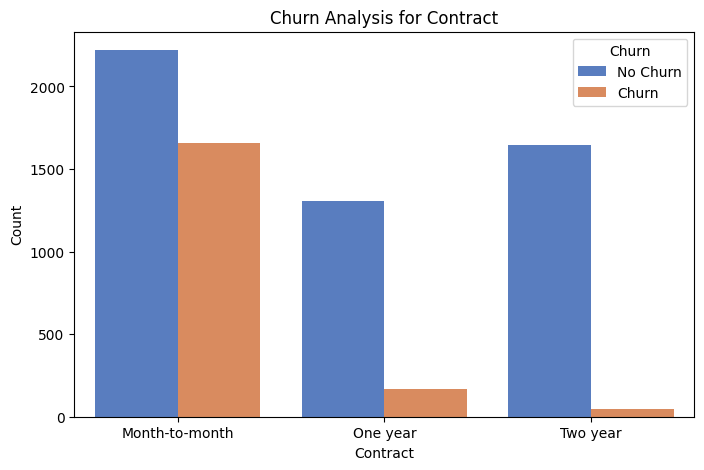

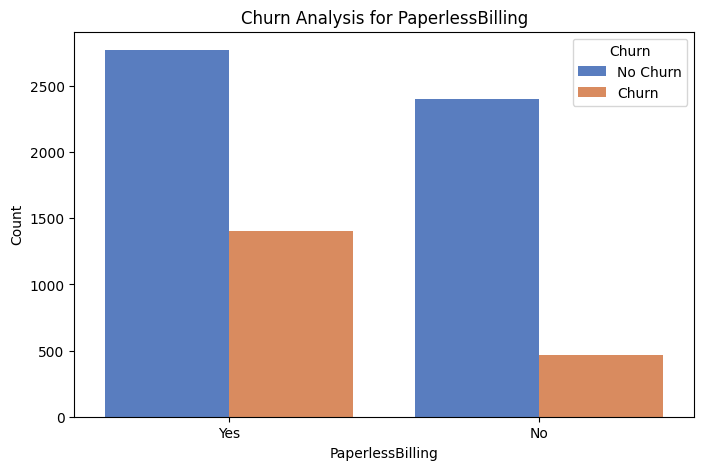

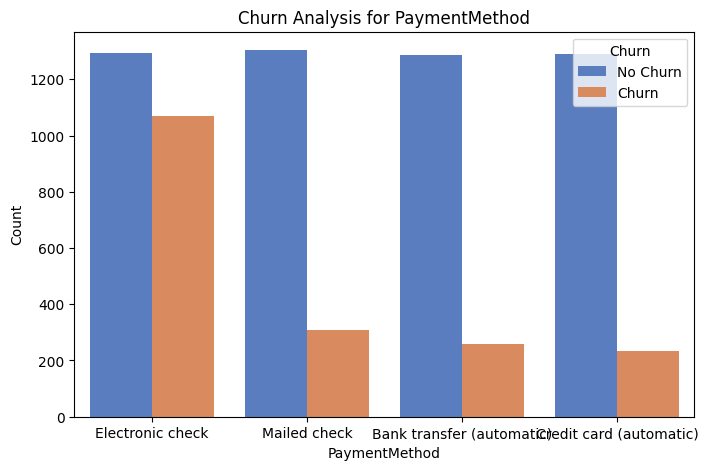

In [26]:
for column in df_1:
    plt.subplots(figsize=(8, 5))
    sns.countplot(x=column, hue=churn_data.Churn, data=churn_data, palette='muted')
    plt.title(f'Churn Analysis for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.show()

In [27]:
df_2.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#note: Imbalaced

# outliers

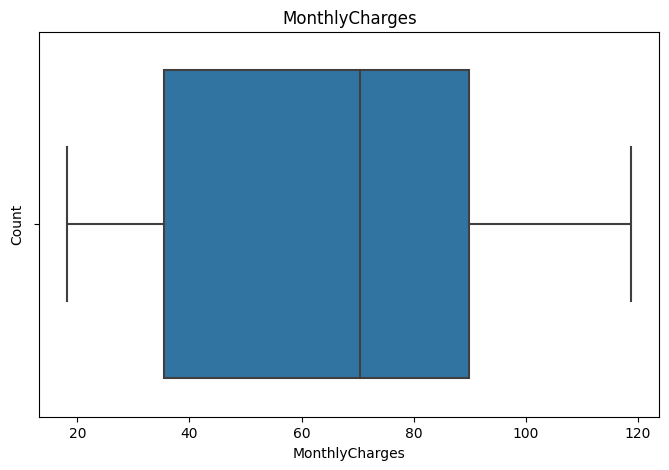

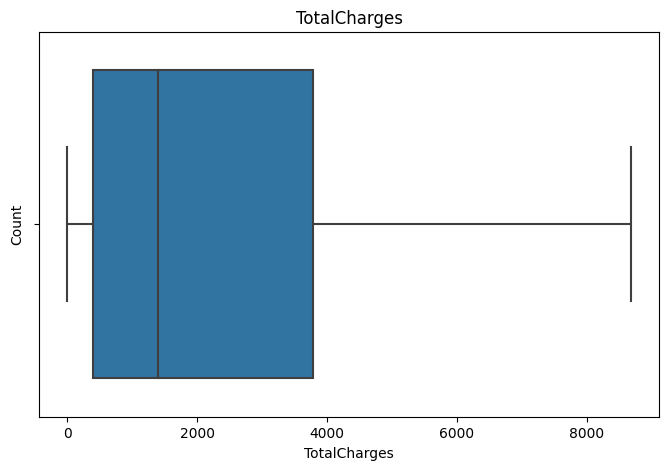

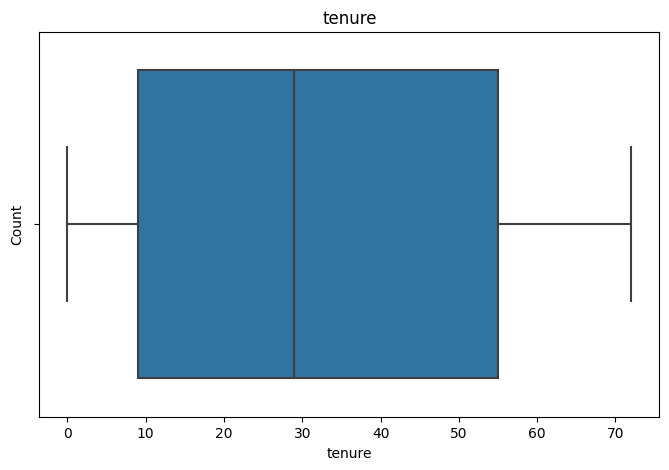

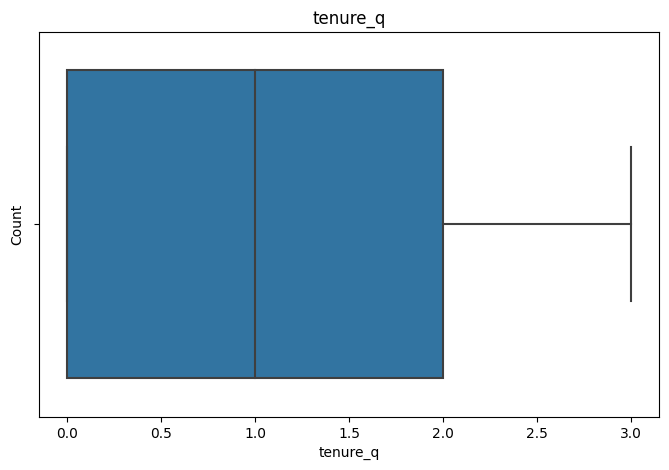

In [28]:
for column in features_num:
    plt.subplots(figsize=(8, 5))
    sns.boxplot(x=column, data=features_num)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [29]:
features_num.corr()

,MonthlyCharges,TotalCharges,tenure,tenure_q
MonthlyCharges,1.000000,0.651174,0.247900,0.242575
TotalCharges,0.651174,1.000000,0.826178,0.796187
tenure,0.247900,0.826178,1.000000,0.969285
tenure_q,0.242575,0.796187,0.969285,1.000000


# feature engineering

In [30]:
dummy=pd.get_dummies(data=churn_data,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first= True)

In [31]:
dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_q,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,56.95,1889.50,2,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,53.85,108.15,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,42.30,1840.75,2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [32]:
dummy.shape

(7043, 31)

In [33]:
dummy.select_dtypes(include='bool').columns.tolist()

[]

In [34]:
bool_columns=['gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn_Yes']
dummy[bool_columns]=dummy[bool_columns].astype(int)
dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_q,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,56.95,1889.50,2,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,53.85,108.15,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,42.30,1840.75,2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [35]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   tenure_q                               7043 non-null   int64  
 4   gender_Male                            7043 non-null   int64  
 5   Partner_Yes                            7043 non-null   int64  
 6   Dependents_Yes                         7043 non-null   int64  
 7   PhoneService_Yes                       7043 non-null   int64  
 8   MultipleLines_No phone service         7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

# Feature Scaling

In [36]:
X=dummy.drop('Churn_Yes', axis=1)
y=dummy['Churn_Yes']

In [37]:
#libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
scaler=StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=44)

Balancing

In [40]:
#libraries
from imblearn.combine import SMOTEENN

In [41]:
sm=SMOTEENN()
resample_x, resample_y = sm.fit_resample(x_train, y_train)

# ML Models

In [42]:
#Libraries
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



Decision Tree Classifier

In [43]:
DT_clf= DecisionTreeClassifier(criterion= "gini" , random_state= 100 , max_depth= 6 , min_samples_leaf=8)
DT_clf.fit(resample_x,resample_y)
DT_predict= DT_clf.predict(x_test)
print(metrics.classification_report(y_test,DT_predict))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1557
           1       0.44      0.84      0.57       556

    accuracy                           0.67      2113
   macro avg       0.67      0.73      0.65      2113
weighted avg       0.79      0.67      0.69      2113



In [44]:
print(metrics.confusion_matrix(y_test,DT_predict))

[[953 604]
 [ 90 466]]


In [45]:
accuracy_score(y_test,DT_predict)

0.6715570279223853

Random Forest Classifier

In [46]:
RF_clf= RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=6, min_samples_leaf= 8 )
RF_clf.fit(resample_x, resample_y)
RF_predict=RF_clf.predict(x_test)
print(metrics.classification_report(y_test,RF_predict))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1557
           1       0.48      0.82      0.61       556

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113



In [47]:
print(metrics.confusion_matrix(y_test,RF_predict))

[[1062  495]
 [  98  458]]


In [48]:
accuracy_score(y_test,RF_predict)

0.7193563653573118

Logistic Regression

In [49]:
log_reg=LogisticRegression(random_state=100)
log_reg.fit(resample_x,resample_y)
log_reg_predict=log_reg.predict(x_test)
print(metrics.classification_report(y_test,log_reg_predict))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1557
           1       0.47      0.85      0.60       556

    accuracy                           0.71      2113
   macro avg       0.70      0.75      0.69      2113
weighted avg       0.80      0.71      0.72      2113



In [50]:
print(metrics.confusion_matrix(y_test,log_reg_predict))

[[1023  534]
 [  85  471]]


In [51]:
accuracy_score(y_test,log_reg_predict)

0.7070515854235684

Gradient Boosting Classifier

In [52]:
GB_clf=GradientBoostingClassifier(criterion='friedman_mse',random_state=100,max_depth=6, min_samples_leaf=8)
GB_clf.fit(resample_x,resample_y)
GB_clf_predict=GB_clf.predict(x_test)
print(metrics.classification_report(y_test,GB_clf_predict))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1557
           1       0.52      0.78      0.62       556

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [53]:
print(metrics.confusion_matrix(y_test,GB_clf_predict))

[[1152  405]
 [ 120  436]]


In [54]:
accuracy_score(y_test,GB_clf_predict)

0.751538097491718

Model Evaluation

In [55]:
df_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [56]:
models = [(DT_clf, 'DecisionTree'),
          (RF_clf, 'RandomForest'),
          (log_reg, 'LogisticRegression'),
          (GB_clf, 'GradientBoost')]

In [57]:
for model , model_name in models:
  model.fit(resample_x,resample_y)
  y_pred=model.predict(x_test)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)

  df_metrics=df_metrics.append({'Model': model_name , 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1 score':f1}, ignore_index=True)

  df_metrics=df_metrics.sort_values(by='Accuracy', ascending=False)

print(df_metrics)

<ipython-input-57-fe73f7c606fe>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics=df_metrics.append({'Model': model_name , 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1 score':f1}, ignore_index=True)
<ipython-input-57-fe73f7c606fe>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics=df_metrics.append({'Model': model_name , 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1 score':f1}, ignore_index=True)
<ipython-input-57-fe73f7c606fe>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics=df_metrics.append({'Model': model_name , 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1 score':f1}, ignore_index=True)


                Model  Accuracy  Precision    Recall F1 Score  f1 score
3       GradientBoost  0.751538   0.518430  0.784173      NaN  0.624195
0        RandomForest  0.721723   0.483051  0.820144      NaN  0.608000
1  LogisticRegression  0.707052   0.468657  0.847122      NaN  0.603459
2        DecisionTree  0.671557   0.435514  0.838129      NaN  0.573186


<ipython-input-57-fe73f7c606fe>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics=df_metrics.append({'Model': model_name , 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1 score':f1}, ignore_index=True)


Preferred #GradientBoost & #RandomForest

#Hyperparameter Tuning

GradientBoost

In [58]:
GB_clf.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
GB_params={'ccp_alpha':[0.0,0.1,0.2],'max_depth':[4,6,8],'min_samples_leaf':[8,10,12], 'n_estimators':[100,1000]}

In [60]:
GB_paramtuning=GridSearchCV(estimator=GB_clf,
                            param_grid=GB_params,
                            scoring=['accuracy','precision','recall','f1'],
                            refit='accuracy',
                            cv=5,
                            verbose=3)

In [61]:
GB_paramtuning.fit(resample_x,resample_y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.907) f1: (test=0.914) precision: (test=0.957) recall: (test=0.875) total time=   1.5s
[CV 2/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.955) f1: (test=0.960) precision: (test=0.972) recall: (test=0.947) total time=   1.5s
[CV 3/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.964) f1: (test=0.968) precision: (test=0.949) recall: (test=0.988) total time=   1.0s
[CV 4/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.958) f1: (test=0.964) precision: (test=0.941) recall: (test=0.988) total time=   1.0s
[CV 5/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.964) f1: (test=0.968) precision: (test=0.954) recall: (test=0.982) total time=   1.0s
[CV 1/5] END ccp_alpha=

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=6,
                                                  min_samples_leaf=8,
                                                  random_state=100),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [8, 10, 12],
                         'n_estimators': [100, 1000]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=3)

In [62]:
GB_clf_tuned=GB_paramtuning.best_estimator_
models.append(GB_clf_tuned)
models

[(DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100),
  'DecisionTree'),
 (RandomForestClassifier(max_depth=6, min_samples_leaf=8), 'RandomForest'),
 (LogisticRegression(random_state=100), 'LogisticRegression'),
 (GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100),
  'GradientBoost'),
 GradientBoostingClassifier(max_depth=8, min_samples_leaf=8, n_estimators=1000,
                            random_state=100)]

Logistic Regression

In [63]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
log_reg_params={ 'C': [1.0,2.0,3.0],
           'max_iter': [1000,10000,100000],
           'intercept_scaling': [1, 2, 3,]}

In [65]:
log_reg_tuning=GridSearchCV(estimator = log_reg,
                             param_grid = log_reg_params,
                             scoring = ['accuracy','precision','recall','f1'],
                             refit = 'accuracy',
                             cv = 5,
                             verbose = 3 )

In [66]:
log_reg_tuning.fit(resample_x,resample_y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.917) f1: (test=0.928) precision: (test=0.910) recall: (test=0.947) total time=   0.0s
[CV 2/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.925) f1: (test=0.934) precision: (test=0.932) recall: (test=0.936) total time=   0.0s
[CV 3/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.897) f1: (test=0.908) precision: (test=0.920) recall: (test=0.897) total time=   0.0s
[CV 4/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.909) f1: (test=0.921) precision: (test=0.907) recall: (test=0.936) total time=   0.0s
[CV 5/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.919) f1: (test=0.929) precision: (test=0.928) recall: (test=0.930) total time=   0.0s
[CV 1/5] END C=1.0, intercept_scaling=1, max_iter=10000; accuracy: (test=0.917) f1: (test=0.928) precision: (test=0.910) recall: (test=0.9

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=100),
             param_grid={'C': [1.0, 2.0, 3.0], 'intercept_scaling': [1, 2, 3],
                         'max_iter': [1000, 10000, 100000]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=3)

In [67]:
log_reg_tuned=log_reg_tuning.best_estimator_
models.append(log_reg_tuned)
models

[(DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100),
  'DecisionTree'),
 (RandomForestClassifier(max_depth=6, min_samples_leaf=8), 'RandomForest'),
 (LogisticRegression(random_state=100), 'LogisticRegression'),
 (GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100),
  'GradientBoost'),
 GradientBoostingClassifier(max_depth=8, min_samples_leaf=8, n_estimators=1000,
                            random_state=100),
 LogisticRegression(C=3.0, max_iter=1000, random_state=100)]

#Exporting data


In [68]:
#Libraries
import pickle
import os


In [69]:
with open("model_GB.pkl","wb") as f:
  pickle.dump(GB_clf_tuned,f)


In [70]:
with open("model_scalar.pkl","wb") as f:
  pickle.dump(scaler,f)